In [10]:
import requests
import pandas as pd
import time
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.getenv("TMDB_API_KEY")

BASE_URL = "https://api.themoviedb.org/3"

# ID da palavra-chave "patriotism"
KEYWORD_ID = 1627

def obter_filmes_por_palavra_chave(api_key, keyword_id, total_filmes=100):
    filmes = []
    pagina = 1
    while len(filmes) < total_filmes:
        url = f"{BASE_URL}/discover/movie"
        params = {
            "api_key": api_key,
            "with_keywords": keyword_id,
            "sort_by": "popularity.desc",
            "page": pagina
        }
        resposta = requests.get(url, params=params)
        if resposta.status_code != 200:
            print(f"Erro na requisição: {resposta.status_code}")
            break
        dados = resposta.json()
        resultados = dados.get("results", [])
        for filme in resultados:
            filmes.append({
                "titulo": filme.get("title"),
                "id_tmdb": filme.get("id"),
                "nota_media": filme.get("vote_average"),
                "n_votos": filme.get("vote_count"),
                "popularidade": filme.get("popularity"),
                "data_lancamento": filme.get("release_date")
            })
            if len(filmes) >= total_filmes:
                break
        pagina += 1
        time.sleep(0.25)  # Para respeitar o rate limit da API
    return filmes

# Obter os 100 filmes mais populares com a palavra-chave "patriotism"
dados_filmes = obter_filmes_por_palavra_chave(API_KEY, KEYWORD_ID, total_filmes=100)

# Criar DataFrame
df = pd.DataFrame(dados_filmes)

# Salvar em CSV
df.to_csv("tmdb_filmes_patrioticos_100.csv", index=False)
print("✅ Arquivo salvo como tmdb_filmes_patrioticos_100.csv")


✅ Arquivo salvo como tmdb_filmes_patrioticos_100.csv


In [12]:
df.head()

,titulo,id_tmdb,nota_media,n_votos,popularidade,data_lancamento
0,Oppenheimer,872585,8.100,10210,79.2249,2023-07-19
1,Casablanca,289,8.157,5618,29.3346,1943-01-15
2,Pearl Harbor,676,6.936,6651,9.5616,2001-05-21
3,Independence Day,602,6.893,9787,8.1634,1996-06-25
4,The Patriot,2024,7.174,4016,7.0041,2000-06-28


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titulo           100 non-null    object 
 1   id_tmdb          100 non-null    int64  
 2   nota_media       100 non-null    float64
 3   n_votos          100 non-null    int64  
 4   popularidade     100 non-null    float64
 5   data_lancamento  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [16]:
# Converte a coluna de data para datetime
df["data_lancamento"] = pd.to_datetime(df["data_lancamento"], errors="coerce")

# Cria a coluna 'ano'
df["ano"] = df["data_lancamento"].dt.year

# Verifica os dados
df[["titulo", "data_lancamento", "ano"]].head()



,titulo,data_lancamento,ano
0,Oppenheimer,2023-07-19,2023
1,Casablanca,1943-01-15,1943
2,Pearl Harbor,2001-05-21,2001
3,Independence Day,1996-06-25,1996
4,The Patriot,2000-06-28,2000


In [18]:
df.head()

,titulo,id_tmdb,nota_media,n_votos,popularidade,data_lancamento,ano
0,Oppenheimer,872585,8.100,10210,79.2249,2023-07-19,2023
1,Casablanca,289,8.157,5618,29.3346,1943-01-15,1943
2,Pearl Harbor,676,6.936,6651,9.5616,2001-05-21,2001
3,Independence Day,602,6.893,9787,8.1634,1996-06-25,1996
4,The Patriot,2024,7.174,4016,7.0041,2000-06-28,2000


C:\Users\Lume\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lume\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


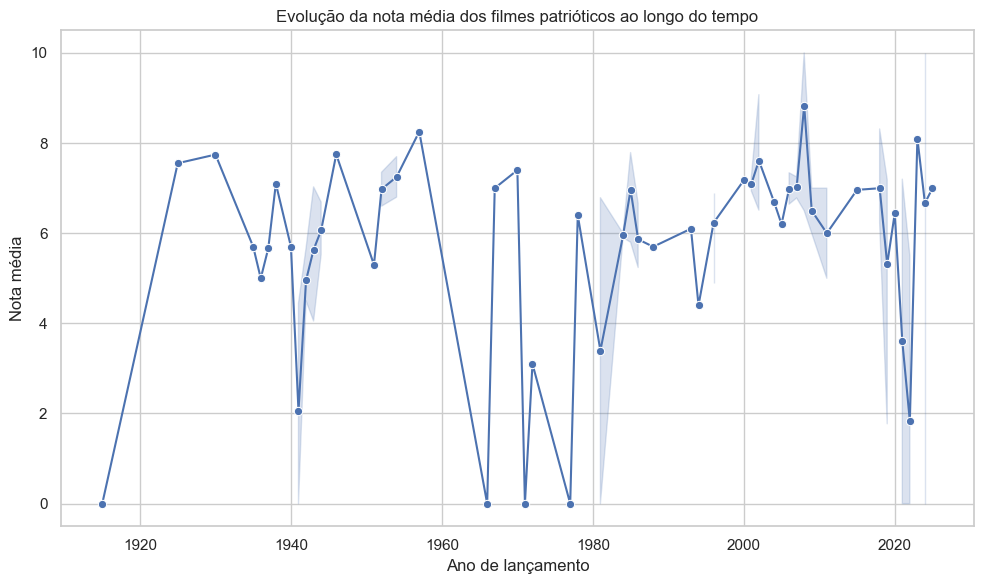

In [20]:
sns.lineplot(data=df.sort_values("ano"), x="ano", y="nota_media", marker="o")
plt.title("Evolução da nota média dos filmes patrióticos ao longo do tempo")
plt.xlabel("Ano de lançamento")
plt.ylabel("Nota média")
plt.tight_layout()
plt.show()


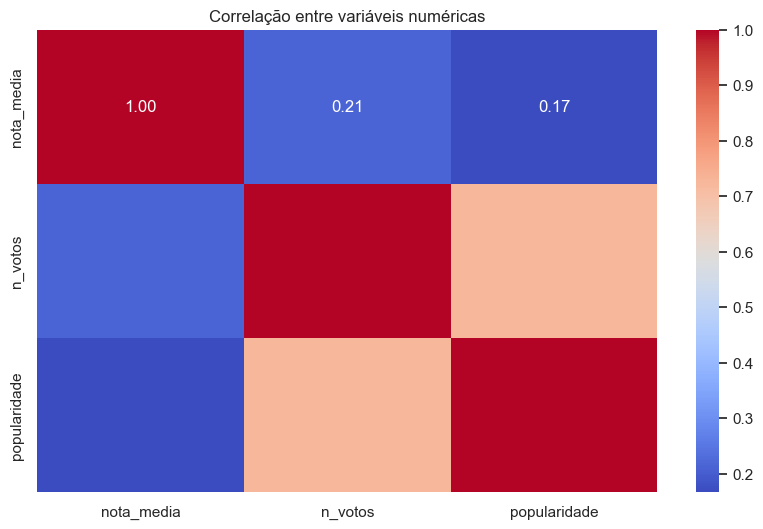

In [32]:
import seaborn as sns

# Heatmap de correlação
sns.heatmap(df[["nota_media", "n_votos", "popularidade"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.show()


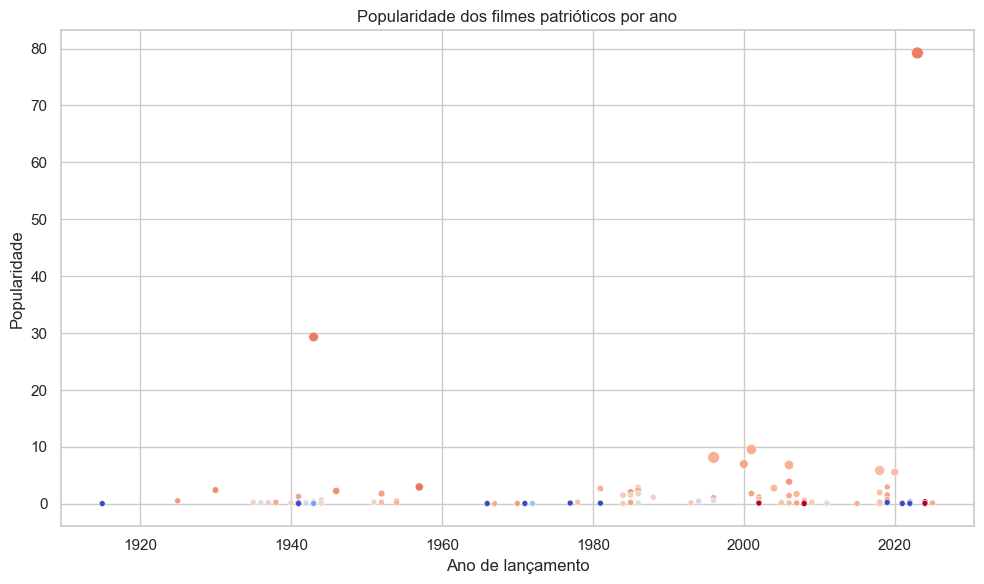

In [40]:
sns.scatterplot(data=df, x="ano", y="popularidade", size="n_votos", hue="nota_media", palette="coolwarm", legend=False)
plt.title("Popularidade dos filmes patrióticos por ano")
plt.xlabel("Ano de lançamento")
plt.ylabel("Popularidade")
plt.tight_layout()
plt.show()


In [64]:
#Adicionando contexto histórico à análise

def classificar_contexto(ano):
    if pd.isna(ano):
        return "Desconhecido"
    elif ano <= 1945:
        return "Segunda Guerra Mundial"
    elif 1946 <= ano <= 1959:
        return "Pós-Guerra"
    elif 1960 <= ano <= 1975:
        return "Guerra do Vietnã"
    elif 1976 <= ano <= 1990:
        return "Pós-Vietnã / Guerra Fria"
    elif 1991 <= ano <= 2000:
        return "Estável"
    elif 2001 <= ano <= 2015:
        return "Pós-11 de Setembro"
    elif 2016 <= ano <= 2019:
        return "Polarização Política"
    elif ano >= 2020:
        return "Pós-Pandemia / Tensão"
    else:
        return "Outro"

# Aplica a função ao DataFrame
df["contexto_historico"] = df["ano"].apply(classificar_contexto)

# Visualiza a distribuição
df["contexto_historico"].value_counts()


contexto_historico
Segunda Guerra Mundial      26
Pós-11 de Setembro          22
Pós-Vietnã / Guerra Fria    14
Pós-Pandemia / Tensão       10
Polarização Política         8
Pós-Guerra                   7
Estável                      6
Guerra do Vietnã             5
Name: count, dtype: int64

In [44]:
df.head()

,titulo,id_tmdb,nota_media,n_votos,popularidade,data_lancamento,ano,contexto_historico
0,Oppenheimer,872585,8.100,10210,79.2249,2023-07-19,2023,Pós-Pandemia / Tensão
1,Casablanca,289,8.157,5618,29.3346,1943-01-15,1943,Segunda Guerra Mundial
2,Pearl Harbor,676,6.936,6651,9.5616,2001-05-21,2001,Pós-11 de Setembro
3,Independence Day,602,6.893,9787,8.1634,1996-06-25,1996,Estável
4,The Patriot,2024,7.174,4016,7.0041,2000-06-28,2000,Estável


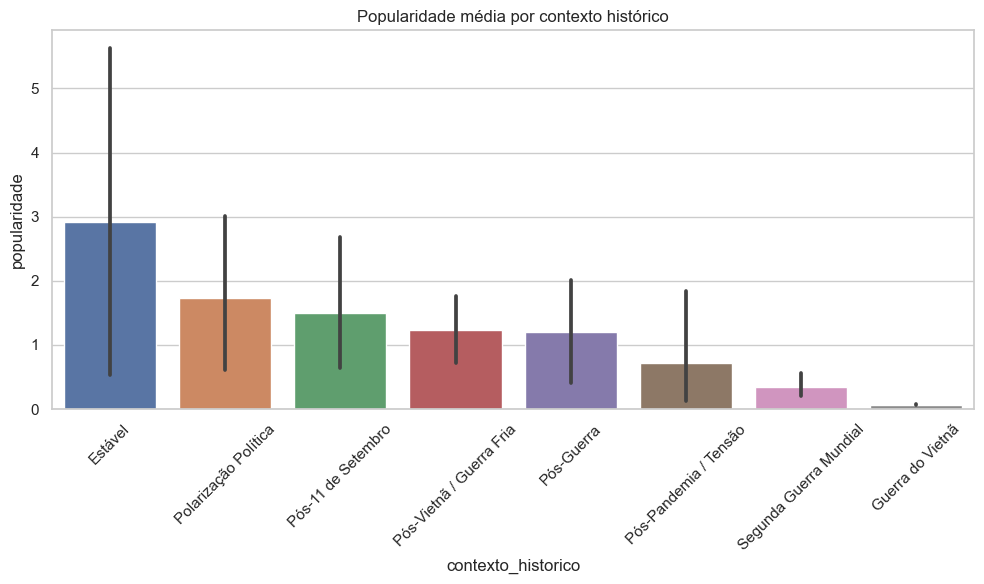

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

ordem = df.groupby("contexto_historico")["popularidade"].mean().sort_values(ascending=False).index

sns.barplot(data=df, x="contexto_historico", y="popularidade", order=ordem)
plt.title("Popularidade média por contexto histórico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
#Remover Oppenheimer e Casablanca, pois são outliers que atrapalha a análise
df = df[df["titulo"] != "Oppenheimer"]
df = df[df["titulo"] != "Casablanca"]


In [54]:
df.head()

,titulo,id_tmdb,nota_media,n_votos,popularidade,data_lancamento,ano,contexto_historico
2,Pearl Harbor,676,6.936,6651,9.5616,2001-05-21,2001,Pós-11 de Setembro
3,Independence Day,602,6.893,9787,8.1634,1996-06-25,1996,Estável
4,The Patriot,2024,7.174,4016,7.0041,2000-06-28,2000,Estável
5,Déjà Vu,7551,6.867,4950,6.8270,2006-11-22,2006,Pós-11 de Setembro
6,Borat Subsequent Moviefilm,740985,6.443,2623,5.5913,2020-10-23,2020,Pós-Pandemia / Tensão


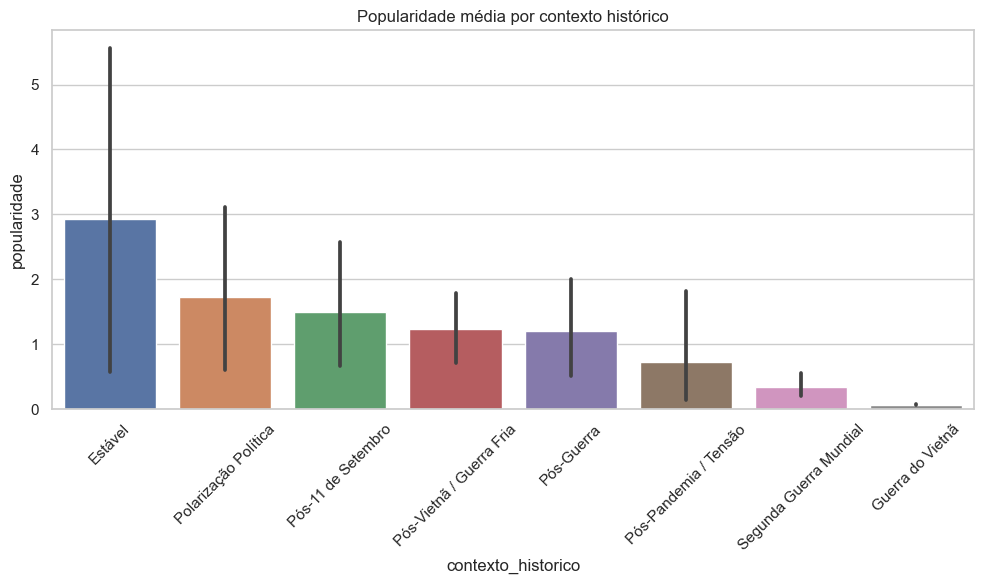

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

ordem = df.groupby("contexto_historico")["popularidade"].mean().sort_values(ascending=False).index

sns.barplot(data=df, x="contexto_historico", y="popularidade", order=ordem)
plt.title("Popularidade média por contexto histórico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

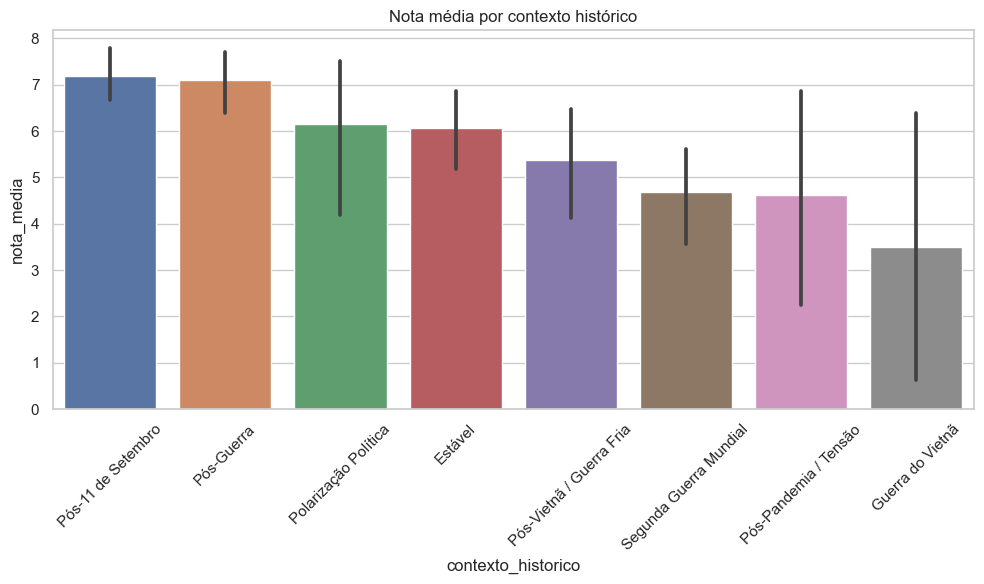

In [70]:
ordem_notas = df.groupby("contexto_historico")["nota_media"].mean().sort_values(ascending=False).index

sns.barplot(data=df, x="contexto_historico", y="nota_media", order=ordem_notas)
plt.title("Nota média por contexto histórico")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


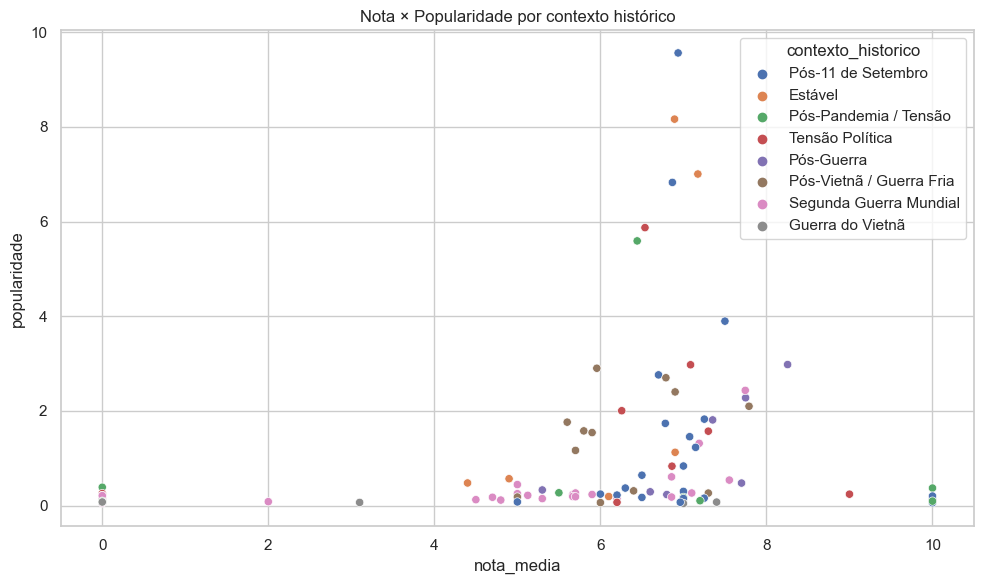

In [60]:
sns.scatterplot(data=df, x="nota_media", y="popularidade", hue="contexto_historico")
plt.title("Nota × Popularidade por contexto histórico")
plt.tight_layout()
plt.show()


In [62]:
df_limpo = df[~df["titulo"].isin(["Oppenheimer", "Casablanca"])]

# Cálculo da média de popularidade por contexto
popularidade_media = df_limpo.groupby("contexto_historico")["popularidade"].mean().sort_values(ascending=False)
print(popularidade_media)


contexto_historico
Estável                     2.922017
Tensão Política             1.727612
Pós-11 de Setembro          1.497355
Pós-Vietnã / Guerra Fria    1.231621
Pós-Guerra                  1.199800
Pós-Pandemia / Tensão       0.724890
Segunda Guerra Mundial      0.346338
Guerra do Vietnã            0.066400
Name: popularidade, dtype: float64
